# Pertemuan 12 - Pengujian dan Evaluasi Kinerja Model

## Capaian Pembelajaran:
> 4.2: Mampu menguji dan mengevaluasi kinerja model machine learning secara komprehensif dengan melakukan validasi silang dan analisis error menggunakan bahasa pemrograman Python dan perangkat lunak pendukung.

## Pokok Bahasan
1. Cross Validation
2. K-Fold Cross-Validation,
3. Leave-One-Out Cross-Validation
4. Stratified Cross-Validation
5. Confusion Matrix
6. Error Analysis
7. Interpretasi Hasil Error


## 1. Cross Validation
Cross-validation adalah teknik yang digunakan dalam machine learning untuk menilai seberapa baik model prediktif akan bekerja pada data independen dari data yang digunakan untuk melatih model. Ini membantu dalam mengukur generalisasi model ke data yang tidak terlihat, yang sangat penting untuk memastikan model yang robust dan andal. Cross-validation membagi data set menjadi dua bagian utama: data pelatihan (training) dan data pengujian (testing). Dalam praktik, data sering kali dibagi menjadi beberapa subset (folds), dan proses pelatihan serta pengujian dilakukan beberapa kali dengan subset yang berbeda.

#### A. Jenis-Jenis Cross Validation
##### a. K-Fold Cross-Validation
- Proses: Data dibagi menjadi k subset (atau folds) yang hampir sama besar. Model dilatih k kali, setiap kali menggunakan k-1 subset sebagai data pelatihan dan 1 subset sebagai data pengujian.
- Keunggulan: Memastikan setiap data point diuji dan digunakan dalam pelatihan.
- Kelemahan: Memerlukan komputasi yang lebih besar dibandingkan metode lain.

##### b. Stratified K-Fold Cross-Validation
- Proses: Mirip dengan K-Fold, tetapi memastikan setiap fold memiliki distribusi yang sama dari kelas yang berbeda.
- Keunggulan: Sangat berguna untuk dataset yang tidak seimbang, menjaga proporsi kelas dalam setiap fold.

##### c. Leave-One-Out Cross-Validation (LOOCV)
- Proses: Setiap data point digunakan sekali sebagai data pengujian dan sisanya sebagai data pelatihan.
- Keunggulan: Menggunakan seluruh data untuk pelatihan dan pengujian.
- Kelemahan: Sangat mahal dalam komputasi untuk dataset besar.

##### d. Hold-Out Method
- Proses: Data dibagi sekali menjadi dua set, satu untuk pelatihan dan satu untuk pengujian.
- Keunggulan: Cepat dan sederhana.
- Kelemahan: Dapat menghasilkan hasil yang bervariasi tergantung pada bagaimana data dibagi.

##### e. Time Series Cross-Validation
- Proses: Data dibagi berdasarkan urutan waktu. Data awal digunakan untuk pelatihan dan data berikutnya untuk pengujian.
- Keunggulan: Cocok untuk data time series.
- Kelemahan: Tidak dapat diacak seperti metode lain.

#### B. Manfaat Cross-Validation
- Akurasi Model: Memberikan estimasi yang lebih akurat tentang kinerja model pada data tidak terlihat.
- Bias dan Variance: Membantu mengidentifikasi masalah bias tinggi (underfitting) atau variance tinggi (overfitting).
- Model Selection: Membantu dalam pemilihan model terbaik dari beberapa kandidat.

#### C. Kelemahan
- Komputasi Intensif: Memerlukan komputasi yang lebih besar, terutama pada dataset besar atau model kompleks.
- Tidak Menangani dengan Baik Data Time Series: Metode standar cross-validation tidak cocok untuk data time series yang memerlukan pemesanan temporal.


#### Implementasi
Dalam implementasi, kita menggunakan library seperti scikit-learn di Python yang menyediakan fungsi-fungsi untuk melakukan cross-validation dengan mudah.

In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Score: 0.9600000000000002


Cross-validation adalah teknik yang penting dan luas digunakan dalam machine learning untuk mengukur kinerja model secara lebih akurat. Memahami dan menerapkan cross-validation dengan benar dapat sangat meningkatkan keandalan dan generalisasi model, yang pada akhirnya menghasilkan prediksi yang lebih baik pada data tidak terlihat.

## 2. K-Fold Cross-Validation
K-Fold Cross-Validation adalah salah satu teknik cross-validation yang paling populer dan sering digunakan dalam machine learning. Teknik ini membagi dataset menjadi k subset atau “folds” yang hampir sama besar, dan proses pelatihan serta pengujian dilakukan sebanyak k kali, setiap kali menggunakan k-1 subset sebagai data pelatihan dan 1 subset sebagai data pengujian.

#### Langkah-Langkah K-Fold Cross-Validation
1. Pembagian Data: Dataset dibagi menjadi k subset yang hampir sama besar. Misalnya, jika k = 5, maka dataset dibagi menjadi 5 bagian.
2. Proses Pelatihan dan Pengujian:
- Pada iterasi pertama, fold pertama digunakan sebagai data pengujian, dan fold kedua hingga kelima digunakan sebagai data pelatihan.
- Pada iterasi kedua, fold kedua digunakan sebagai data pengujian, dan fold pertama, serta fold ketiga hingga kelima digunakan sebagai data pelatihan.
- Proses ini diulang hingga setiap fold telah digunakan sekali sebagai data pengujian.
3. Evaluasi Model: Pada setiap iterasi, model dilatih menggunakan data pelatihan dan dievaluasi menggunakan data pengujian. Hasil evaluasi dari setiap iterasi dicatat.
4. Perhitungan Skor Rata-Rata: Setelah semua iterasi selesai, hasil evaluasi (misalnya akurasi, presisi, recall, dll.) dari setiap iterasi dirata-ratakan untuk memberikan estimasi kinerja model.

#### Contoh Implementasi K-Fold Cross-Validation
Berikut adalah contoh implementasi K-Fold Cross-Validation menggunakan scikit-learn di Python:


In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=kf)

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Score: 0.9600000000000002


#### Keunggulan K-Fold Cross-Validation
- Menggunakan Seluruh Data: Setiap data point digunakan sebagai bagian dari data pelatihan dan data pengujian, sehingga memaksimalkan penggunaan dataset.
- Mengurangi Variansi: Hasil evaluasi yang diperoleh lebih stabil karena dilakukan pada beberapa subset yang berbeda.
- Generalizability: Memberikan estimasi yang lebih baik tentang kinerja model pada data yang tidak terlihat dibandingkan metode hold-out sederhana.

#### Kelemahan K-Fold Cross-Validation
- Komputasi yang Lebih Besar: Memerlukan pelatihan model k kali, yang bisa menjadi mahal dari segi komputasi terutama untuk dataset yang besar dan model yang kompleks.
- Tidak Cocok untuk Data Time Series: K-Fold Cross-Validation tidak cocok untuk data time series yang memerlukan urutan temporal tertentu.

#### Variasi K-Fold Cross-Validation
- Stratified K-Fold: Memastikan bahwa setiap fold memiliki distribusi kelas yang sama dengan distribusi kelas asli. Ini sangat berguna untuk dataset dengan kelas yang tidak seimbang.
- Repeated K-Fold: Mengulang proses K-Fold Cross-Validation beberapa kali dengan pembagian data yang berbeda pada setiap pengulangan untuk mendapatkan estimasi kinerja yang lebih akurat.

## 3. Leave-One-Out Cross-Validation
Leave-One-Out Cross-Validation (LOOCV) adalah variasi dari K-Fold Cross-Validation yang sangat ekstrem di mana jumlah fold sama dengan jumlah data point dalam dataset. Dalam LOOCV, setiap data point digunakan sekali sebagai data pengujian dan semua data point lainnya digunakan sebagai data pelatihan. Ini berarti bahwa jika Anda memiliki n data point, model akan dilatih n kali.

#### Langkah-Langkah LOOCV
1. Pembagian Data: Dataset dibagi menjadi n subset, di mana n adalah jumlah total data point dalam dataset. Setiap subset hanya terdiri dari satu data point.
2. Oroses Pelatihan dan Pengujian:
- Pada setiap iterasi, satu data point dipisahkan sebagai data pengujian, dan data point yang tersisa digunakan sebagai data pelatihan.
- Model dilatih menggunakan data pelatihan dan dievaluasi menggunakan data pengujian.
- Proses ini diulang hingga setiap data point telah digunakan sekali sebagai data pengujian.
3. Evaluasi Model: Hasil evaluasi (misalnya akurasi, kesalahan, dll.) dari setiap iterasi dicatat.
4. Perhitungan Skor Rata-Rata: Setelah semua iterasi selesai, hasil evaluasi dari setiap iterasi dirata-ratakan untuk memberikan estimasi kinerja model.

In [4]:
#### Contoh Implementasi LOOCV

from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV
scores = cross_val_score(model, X, y, cv=loo)

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean Score: 0.9533333333333334


#### Keunggulan LOOCV
- Penggunaan Maksimal Data: Setiap data point digunakan untuk pelatihan dan pengujian, sehingga memaksimalkan penggunaan dataset.
- Tidak Ada Pembagian Data Acak: Menghilangkan variabilitas yang berasal dari pembagian data acak, memberikan hasil yang sangat deterministik.

#### Kelemahan LOOCV
- Komputasi yang Sangat Intensif: Memerlukan pelatihan model sebanyak n kali, yang bisa sangat mahal dari segi komputasi terutama untuk dataset yang besar.
- High Variance: Hasil dari LOOCV dapat memiliki variansi yang tinggi karena evaluasi dilakukan hanya pada satu data point setiap kali, yang dapat menyebabkan hasil yang sangat bervariasi jika data point tersebut adalah outlier.

#### Penggunaan LOOCV dalam Praktik
LOOCV sering digunakan dalam situasi di mana dataset sangat kecil, dan penting untuk memaksimalkan penggunaan setiap data point. Namun, untuk dataset yang lebih besar, K-Fold Cross-Validation (dengan k yang lebih kecil dari n) lebih sering digunakan karena mengurangi beban komputasi sambil tetap memberikan estimasi kinerja yang baik. Dengan LOOCV, kita mendapatkan estimasi yang sangat akurat tentang bagaimana model akan berperforma pada data yang belum pernah dilihat, tetapi dengan biaya komputasi yang sangat tinggi. Oleh karena itu, pemilihan antara LOOCV dan metode cross-validation lainnya harus mempertimbangkan ukuran dataset dan sumber daya komputasi yang tersedia.

## 4. Stratified Cross-Validation
Stratified Cross-Validation adalah variasi dari K-Fold Cross-Validation yang memastikan bahwa setiap fold atau subset memiliki distribusi kelas yang serupa dengan distribusi kelas pada dataset asli. Hal ini sangat berguna untuk dataset dengan kelas yang tidak seimbang, di mana jumlah data dalam satu kelas jauh lebih sedikit dibandingkan kelas lainnya. Dengan menggunakan Stratified Cross-Validation, kita bisa mendapatkan evaluasi kinerja model yang lebih representatif.

#### Langkah-Langkah Stratified Cross-Validation
1. Pembagian Data: Dataset dibagi menjadi k subset (folds) seperti pada K-Fold Cross-Validation, tetapi pembagian ini dilakukan dengan menjaga distribusi kelas dalam setiap subset tetap serupa dengan distribusi kelas pada dataset asli.
2. Proses Pelatihan dan Pengujian:
- Pada iterasi pertama, fold pertama digunakan sebagai data pengujian, dan fold kedua hingga k digunakan sebagai data pelatihan.
- Pada iterasi kedua, fold kedua digunakan sebagai data pengujian, dan fold pertama serta fold ketiga hingga k digunakan sebagai data pelatihan.
- Proses ini diulang hingga setiap fold telah digunakan sekali sebagai data pengujian.
3. Evaluasi Model: Pada setiap iterasi, model dilatih menggunakan data pelatihan dan dievaluasi menggunakan data pengujian. Hasil evaluasi dari setiap iterasi dicatat.
4. Perhitungan Skor Rata-Rata: Setelah semua iterasi selesai, hasil evaluasi dari setiap iterasi dirata-ratakan untuk memberikan estimasi kinerja model.


#### Contoh Implementasi Stratified Cross-Validation
Berikut adalah contoh implementasi Stratified Cross-Validation menggunakan scikit-learn di Python:

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=skf)

print("Stratified Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Stratified Cross-Validation Scores: [1.         0.96666667 0.93333333 1.         0.9       ]
Mean Score: 0.9600000000000002


#### Keunggulan Stratified Cross-Validation
- Distribusi Kelas yang Seimbang: Menjaga proporsi kelas yang sama di setiap fold, yang sangat penting untuk dataset dengan kelas yang tidak seimbang.
- Estimasi Kinerja yang Akurat: Memberikan estimasi kinerja model yang lebih representatif karena distribusi kelas yang terjaga.


#### Kelemahan Stratified Cross-Validation
- Kompleksitas Tambahan: Memerlukan langkah tambahan untuk memastikan bahwa setiap fold memiliki distribusi kelas yang sama, yang bisa lebih rumit dibandingkan K-Fold Cross-Validation biasa.

#### Penggunaan dalam Praktik
Stratified Cross-Validation sangat berguna dalam situasi di mana dataset memiliki kelas yang tidak seimbang, seperti dalam masalah klasifikasi di mana satu kelas jauh lebih banyak atau lebih sedikit daripada kelas lainnya. Dengan memastikan bahwa setiap fold memiliki distribusi kelas yang sama, kita dapat menghindari bias dalam evaluasi kinerja model dan mendapatkan gambaran yang lebih akurat tentang bagaimana model akan berperforma pada data yang tidak terlihat. Dalam prakteknya, Stratified Cross-Validation sering digunakan dalam klasifikasi biner dan multi-kelas, serta dalam berbagai domain seperti kedokteran, keuangan, dan ilmu sosial di mana dataset sering kali tidak seimbang.

## 5. Confusion Matrix
Confusion Matrix adalah alat evaluasi yang digunakan dalam klasifikasi machine learning untuk memahami kinerja model. Matrix ini menyajikan hasil klasifikasi dalam bentuk tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Confusion Matrix memberikan gambaran lengkap tentang bagaimana model melakukan prediksi dan di mana model membuat kesalahan.

### Struktur Confusion Matrix
Confusion Matrix untuk masalah klasifikasi biner terdiri dari empat elemen utama:
1. True Positive (TP): Jumlah data yang benar-benar positif dan diprediksi sebagai positif oleh model.
2. True Negative (TN): Jumlah data yang benar-benar negatif dan diprediksi sebagai negatif oleh model.
3. False Positive (FP): Jumlah data yang benar-benar negatif tetapi diprediksi sebagai positif oleh model (juga dikenal sebagai Type I Error).
4. False Negative (FN): Jumlah data yang benar-benar positif tetapi diprediksi sebagai negatif oleh model (juga dikenal sebagai Type II Error).

Tabel berikut menggambarkan Confusion Matrix untuk klasifikasi biner:
![image.png](attachment:image.png)

#### Contoh Implementasi Confusion Matrix di Python
Berikut adalah contoh menghitung Confusion Matrix dan metrik terkait menggunakan scikit-learn di Python:

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Binary classification (taking only two classes for simplicity)
X = X[y != 2]
y = y[y != 2]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model
model = RandomForestClassifier()

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
 [[17  0]
 [ 0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


#### Interpretasi Confussion Matrix
![image.png](attachment:image.png)

Confusion Matrix dan metrik terkait memberikan gambaran yang komprehensif tentang kinerja model, menunjukkan tidak hanya seberapa baik model memprediksi secara keseluruhan tetapi juga bagaimana model menangani berbagai jenis kesalahan.

## 6. Error Analysis
Error analysis dalam machine learning adalah proses sistematis untuk mengidentifikasi dan memahami kesalahan yang dilakukan oleh model prediksi. Ini membantu dalam mengevaluasi kinerja model secara mendalam dan mengidentifikasi area untuk perbaikan. Berikut ini adalah beberapa langkah dan teknik yang umum digunakan dalam error analysis:

#### a. Menganalisis Confusion Matrix
Confusion Matrix menyediakan cara yang komprehensif untuk melihat bagaimana model mengelompokkan prediksi ke dalam kategori benar dan salah. Dengan melihat nilai TP, TN, FP, dan FN, kita bisa memahami pola kesalahan.

#### b. Menghitung Metrik Evaluasi
Selain metrik umum seperti akurasi, precision, recall, dan F1-score, penting untuk melihat metrik lainnya tergantung pada konteks dan tujuan model.

#### c. Visualisasi Kesalahan
Visualisasi kesalahan bisa membantu dalam memahami distribusi kesalahan dan mengidentifikasi pola yang tidak terdeteksi hanya dengan melihat metrik numerik.
- ROC Curve: Menunjukkan trade-off antara true positive rate dan false positive rate
- Precision-Recall Curve: Berguna untuk dataset dengan kelas tidak seimbang.
- Error Distribution Plots: Menunjukkan distribusi kesalahan prediksi.

#### d. Analisis Kesalahan Per Kelas
Mengidentifikasi kelas mana yang paling sering salah diprediksi bisa membantu dalam memahami ketidakseimbangan kelas atau kesulitan spesifik dalam membedakan kelas tertentu.

#### e. Analisis Kesalahan Berdasarkan Fitur
Melihat kesalahan berdasarkan fitur atau subset dari data bisa membantu dalam menemukan pola atau karakteristik spesifik yang menyebabkan kesalahan.

#### f. Menggunakan Teknik Interpretasi Model
Teknik seperti SHAP (SHapley Additive exPlanations) dan LIME (Local Interpretable Model-agnostic Explanations) dapat membantu dalam memahami mengapa model membuat prediksi tertentu dan di mana model mungkin salah.

#### g. Cross-Validation dan Train/Test Split
- Cross-Validation: Membantu dalam memastikan bahwa hasil error analysis tidak terlalu bergantung pada satu split dari data.
- Train/Test Split: Membandingkan kinerja model pada set pelatihan dan pengujian bisa menunjukkan apakah model overfitting atau underfitting.

#### h. Analisis Residual
Dalam masalah regresi, menganalisis residual (selisih antara nilai yang diprediksi dan nilai aktual) bisa menunjukkan pola yang tidak diprediksi dengan baik oleh model.

#### Contoh Implementasi Error Analysis
Berikut adalah contoh implementasi dasar error analysis menggunakan confusion matrix dan beberapa metrik evaluasi di Python:


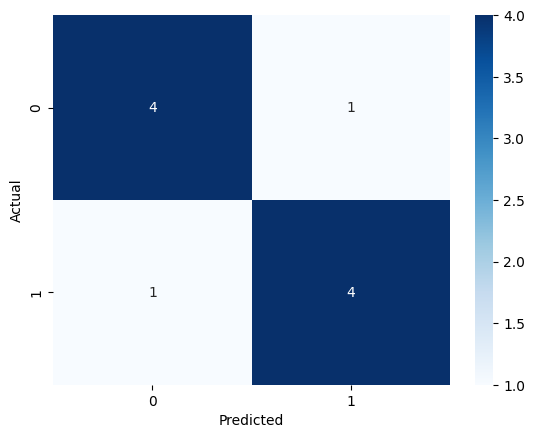

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



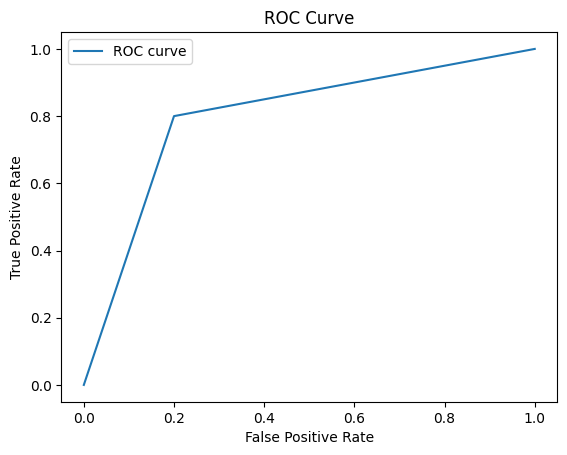

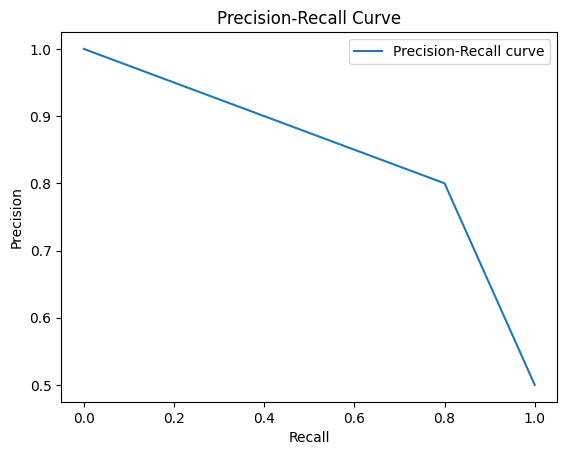

AUC Score: 0.8


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan kita sudah memiliki y_test dan y_pred
y_test = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 0, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

## 7. Interpretasi Hasil Error
Menginterpretasi hasil dari analisis error membantu dalam memahami kekuatan dan kelemahan model. Berikut ini adalah beberapa langkah untuk menginterpretasi hasil dari contoh yang telah diberikan, termasuk confusion matrix, classification report, ROC curve, precision-recall curve, dan AUC score.
- Kesalahan Prediksi (False Positives dan False Negatives): Dari confusion matrix, kita dapat melihat bahwa model membuat beberapa kesalahan prediksi. False negatives menunjukkan bahwa model kehilangan beberapa data positif, sedangkan false positives menunjukkan bahwa model salah memprediksi data negatif sebagai positif. Kedua jenis kesalahan ini memiliki implikasi yang berbeda tergantung pada konteks masalah.
- Kinerja pada Kelas Tidak Seimbang: Classification report menunjukkan bahwa model memiliki precision dan recall yang cukup baik untuk kedua kelas, tetapi ada ruang untuk perbaikan terutama jika satu kelas lebih penting daripada yang lain.
- Kinerja Keseluruhan: AUC score dan precision-recall curve menunjukkan bahwa model memiliki kinerja yang cukup baik dalam membedakan antara kelas positif dan negatif. Namun, jika AUC score atau precision-recall curve menunjukkan kinerja yang rendah, ini mungkin menunjukkan perlunya peningkatan model atau penanganan khusus untuk kelas yang tidak seimbang.